# Model

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df_clean = pd.read_csv("data/data_clean.csv")

In [3]:
df_clean 

,Unnamed: 0.1,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,_<1H OCEAN,_INLAND,_ISLAND,_NEAR BAY,_NEAR OCEAN
0,0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,0,1,0,0,0
1,1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,1,0,0,0,0
2,2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,0,1,0,0,0
3,3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,1,0,0,0,0
4,4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13179,16506,14696,-117.09,32.79,36.0,1529.0,266.0,683.0,260.0,4.0982,171200.0,0,0,0,0,1
13180,16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,0,1,0,0,0
13181,16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,0,0,0,1,0
13182,16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,0,1,0,0,0


## define predictor and outcomes variables 

In [28]:
X = df_clean.drop(["median_house_value", "Unnamed: 0.1"], axis = 1)
y = df_clean["median_house_value"]

## Create linear regression model

In [29]:
import statsmodels.api as sm

X = sm.add_constant(X)

In [30]:
# Train test split 
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.8, random_state = 42)

# Linear regression model

model = sm.OLS(train_y, train_X)
model = model.fit()
print(model.summary2())

                            Results: Ordinary least squares
Model:                     OLS                     Adj. R-squared:          0.631      
Dependent Variable:        median_house_value      AIC:                     260748.4172
Date:                      2023-01-25 11:41        BIC:                     260850.1076
No. Observations:          10547                   Log-Likelihood:          -1.3036e+05
Df Model:                  13                      F-statistic:             1385.      
Df Residuals:              10533                   Prob (F-statistic):      0.00       
R-squared:                 0.631                   Scale:                   3.1901e+09 
---------------------------------------------------------------------------------------
                       Coef.      Std.Err.     t     P>|t|      [0.025        0.975]   
---------------------------------------------------------------------------------------
const              -1675943.3201 83299.3336 -20.1195 0.0000 

Info : 

- no.observation is 10547 (80% of the overall dataset)
- R-squared (goodness of the model from 0 to 1) is 0.631
- p-value >0.05 for some predictors: meaning that we would consider removing these variables from the predictors list! It is because p-values determine whether the relationships that we observe in this sample also exist in the larger population.

## Predict on test set

We will use model.predict on the test_X and compare the predictions with the actual test_y values.

In [33]:
predictions = model.predict(test_X)

df_results = pd.DataFrame({'Actual': test_y, 'Predicted': predictions})

In [21]:
df_results

,Actual,Predicted
1795,117000.0,192186.048564
5099,414300.0,251854.804372
9334,68500.0,67814.772116
1078,225700.0,298302.244048
8784,76200.0,99183.418510
...,...,...
2239,275000.0,120456.381318
3595,68400.0,96580.872163
9806,232400.0,260770.328436
6255,146700.0,254608.251962


## Evaluate the model 

Let's find RMSE and R2 

In [35]:
from sklearn.metrics import r2_score, mean_squared_error

RMSE = np.sqrt(mean_squared_error(test_y, predictions))
r2 = r2_score(test_y, predictions)
print('RMSE:', RMSE, 'R2 :',r2)

RMSE: 55931.12963190345 R2 : 0.6268235530826073


## Model assumptions

Before we built a linear regression model, we make the following assumptions:

- Linearity: The relationship between X and the mean of Y is linear.
- Normality: The residuals follow a normal distribution and the expected mean of the residuals is zero.
- Homoscedasticity: The variance of residual is constant for all values of X.
- No autocorrelation: Residuals are independent of each other.
- No multicollinearity: There is no high correlation between predictor variables.

### Linearity

We will test linearity with a scatter plot to see predicted values versus the actual values. Ideally, the data points should lie around the diagonal line on the plot.

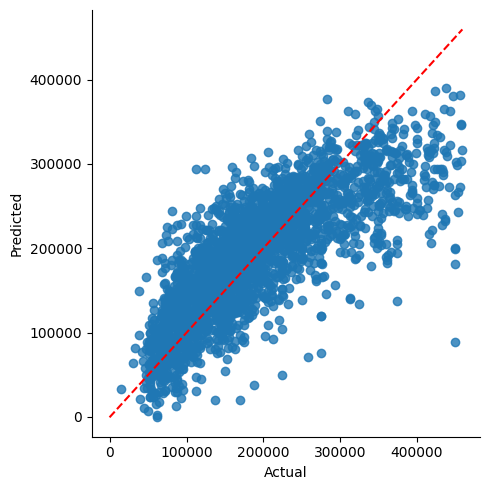

In [10]:
# Plot the actual vs predicted results
sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)

# Plot the diagonal line 
d_line= np.arange(df_results.min().min(), df_results.max().max())
plt.plot(d_line, d_line, color='red', linestyle='--')
plt.show()

In my dataset, i can see that there is not a perfect relashionship. On the lower values our predictions are biased 

### Normality

We will test normality by checking with the quantile-quantile plot, Q-Q plot.

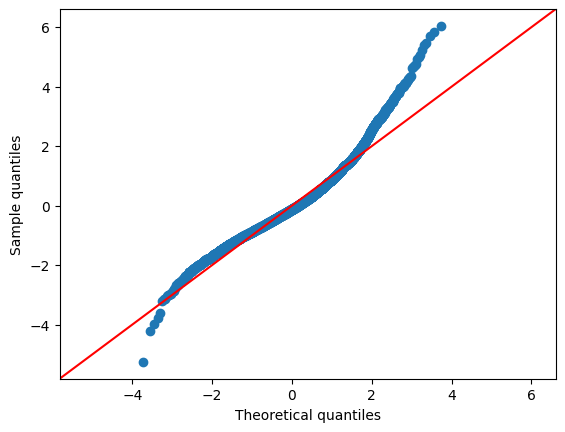

In [11]:
from statsmodels.graphics.gofplots import qqplot 

fig = qqplot(model.resid_pearson, line = '45', fit = 'True')
plt.xlabel("Theoretical quantiles")
plt.ylabel("Sample quantiles")
plt.show()

We can see that our model biasing

### Homoscedasticity

We will test homoscedasticity by plotting the residuals and checking if the variance is uniform.

/home/selmane/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


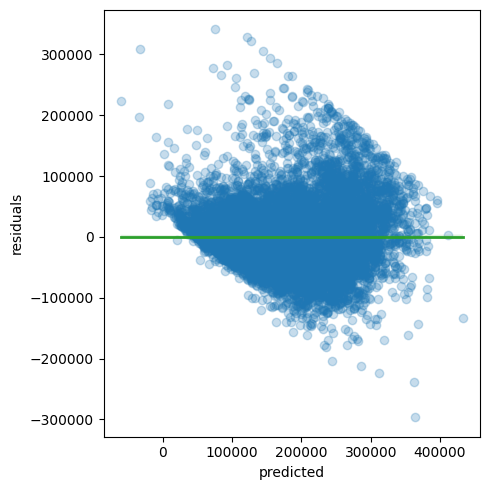

In [12]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.regplot(model.fittedvalues,model.resid, scatter_kws={'alpha': 0.25}, line_kws={'color': 'C2', 'lw': 2}, ax=ax)
ax.set_xlabel('predicted')
ax.set_ylabel('residuals')
plt.tight_layout()
plt.show()

We can say that the distribution of our residuals is not completely uniform.

### No Autocorrelation

We will perform the Durbin-Watson test to determine if the no autocorrelation assumption holds.

In [13]:
from statsmodels.stats.stattools import durbin_watson
durbinWatson = durbin_watson(model.resid)
print("Durbin-Watson:", durbinWatson)

Durbin-Watson: 1.971295798599542


The Durbin-Watson statistic ranges between 0 and 4 : 
- A value of 2.0 means that there is no autocorrelation. 
- Values between 0 and 2 indicate positive 
- values between 2 and 4 indicate negative autocorrelation. 

In our case, Durbin-Watson statistic is very close to 2.0 therefore we can say that no autocorrelation assumption is not violated.

### No Multicolinearity

We will plot a heatmap to see the correlation between predictors visually and we will also calculate the variance inflation factor (VIF), which measures the multicollinearity among the independent variables.

In [14]:
mask = np.zeros_like(train_X.drop("const", axis=1).corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(train_X.drop("const", axis=1).corr().round(2), annot=True, mask=mask, cmap="cividis")bb

<AxesSubplot:>

And we calculate VIF:

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
for i in range(len(X.columns)):
    v=vif(np.matrix(X),i)
    print("Variance inflation factor for {}: {}".format(X.columns[i],round(v,2)))

Variance inflation factor for Unnamed: 0: 1.25
Variance inflation factor for longitude: 17.59
Variance inflation factor for latitude: 19.65
Variance inflation factor for housing_median_age: 1.3
Variance inflation factor for total_rooms: 10.31
Variance inflation factor for total_bedrooms: 9.44
Variance inflation factor for population: 3.33
Variance inflation factor for median_income: 2.42
Variance inflation factor for _<1H OCEAN: 13854.19
Variance inflation factor for _INLAND: 10758.67
Variance inflation factor for _ISLAND: 11.02
Variance inflation factor for _NEAR BAY: 3571.48
Variance inflation factor for _NEAR OCEAN: 4165.4


Info : 
- A VIF of 1 indicates two variables are not correlated
- A VIF between 1 and 5 indicates a moderate correlation 
- And a VIF above 5 indicates a high correlation.

As result shows we have 5 high correlated and 2 moderately correlated variables. It is better if we get rid of some of them.